In [1]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
img_array = cv2.imread("train dataset\open eye\s0001_01838_0_1_0_0_1_01.png",cv2.IMREAD_GRAYSCALE)

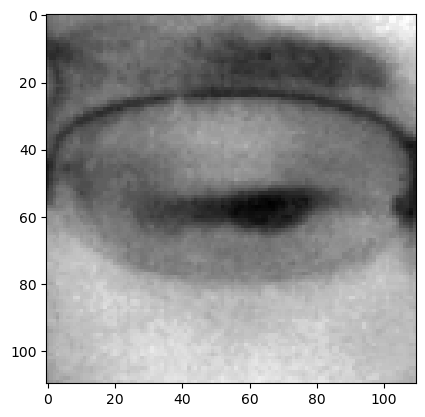

In [3]:
plt.imshow(img_array,cmap="gray")


In [4]:
img_array.shape


(110, 110)

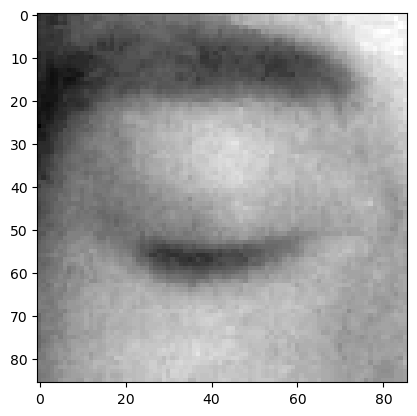

In [5]:
Datadirectory = "test dataset/"
Classes =["closed eye","opened eye"]
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
    
        

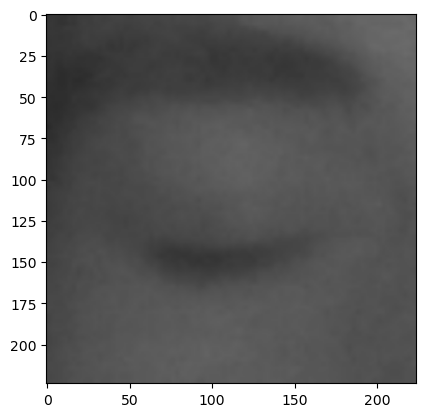

In [6]:
img_size = 224
new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()


In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except exception as e:
                pass

In [8]:
create_training_Data()


In [9]:
print(len(training_Data))


3542


In [10]:
import random

random.shuffle(training_Data)

In [11]:
X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1,img_size,img_size,3)    

In [12]:
X.shape

(3542, 224, 224, 3)

In [13]:
X=X/255.0;


In [14]:
Y=np.array(y)

In [15]:
import pickle
pickle_out =open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out =open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [16]:

pickle_in =open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in =open("y.pickle","rb")
y = pickle.load(pickle_in)



In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [20]:
base_input=model.layers[0].input 

In [21]:
base_output=model.layers[-4].output


In [22]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [23]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [25]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:

new_model.fit(X,Y,epochs=5,validation_split=0.2)

Epoch 1/5
89/89 [==============================] - 1139s 13s/step - loss: 0.0924 - accuracy: 0.9742 - val_loss: 1.3731 - val_accuracy: 0.6968
Epoch 2/5
89/89 [==============================] - 405s 5s/step - loss: 0.0164 - accuracy: 0.9961 - val_loss: 2.1432 - val_accuracy: 0.7080
Epoch 3/5
89/89 [==============================] - 400s 4s/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.1966 - val_accuracy: 0.9379
Epoch 4/5
89/89 [==============================] - 636s 7s/step - loss: 3.0812e-04 - accuracy: 1.0000 - val_loss: 0.0335 - val_accuracy: 0.9845
Epoch 5/5
89/89 [==============================] - 394s 4s/step - loss: 9.8832e-05 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9986


In [27]:
new_model.save('my_modelx.h5')

In [28]:
new_model=tf.keras.models.load_model('my_modelx.h5')

In [29]:
img_array = cv2.imread('s0031_01442_1_0_1_1_1_02.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [30]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [31]:
X_input.shape

(1, 224, 224, 3)

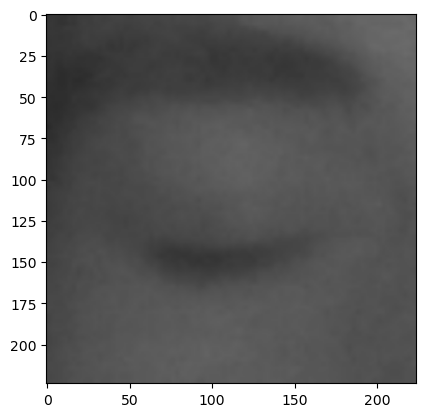

In [32]:
plt.imshow(new_array)

In [33]:
X_input=X_input/255.0

In [34]:
prediction=new_model.predict(X_input)

1/1 [==============================] - 1s 1s/step


In [35]:
prediction

array([[1.1143218e-07]], dtype=float32)

In [36]:
img = cv2.imread('nmodi.jpg')

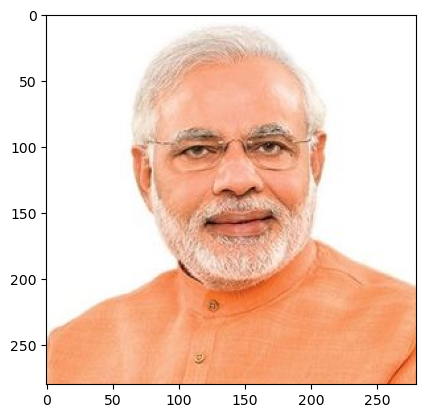

In [37]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [38]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [39]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [40]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [41]:


eyes = eye_cascade.detectMultiscale(gray,1.1,4)

AttributeError: 'cv2.CascadeClassifier' object has no attribute 'detectMultiscale'

In [ ]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))